In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from bidict import bidict
import json

In [3]:
df_3er_and_4er_forum_posts_extended = pd.read_pickle("data/3er_and_4er_forum_posts_extended.pkl")
df_3er_and_4er_forum_threads = pd.read_pickle("data/3er_and_4er_forum_threads.pkl")

In [4]:
# remove the threads, that have only 1 post
all_threads_without_answer = df_3er_and_4er_forum_posts_extended["Thread_ID"].value_counts()[df_3er_and_4er_forum_posts_extended["Thread_ID"].value_counts() == 1].index.values
df_3er_and_4er_forum_posts_filtered = df_3er_and_4er_forum_posts_extended[~df_3er_and_4er_forum_posts_extended["Thread_ID"].isin(all_threads_without_answer)]

<Axes: xlabel='number of posts in thread', ylabel='number of threads'>

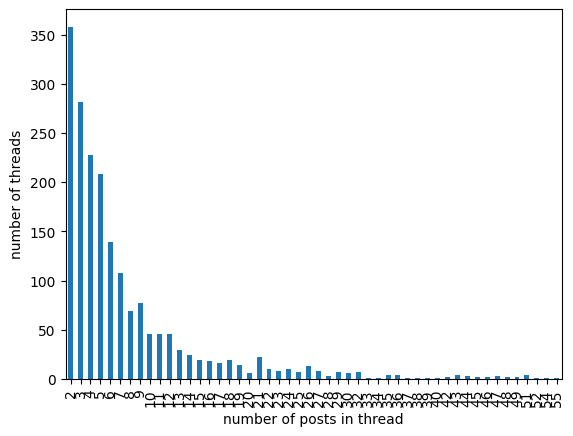

In [5]:
df_3er_and_4er_forum_posts_filtered["Thread_ID"].value_counts().value_counts().sort_index()[:50].plot(kind="bar", xlabel="number of posts in thread", ylabel="number of threads")

In [6]:
# I want to make all usernames anonimous
# But I want to keep an indication of who wrote what post, because sometimes people are refereing to a specific person

# look at all posts
# get all usernames
# sort usernames by number of posts
# map usernames to username#1, username#2, etc.
# save mapping in a dictionary
# save mapping in a json file

# get all usernames
# sort usernames by number of posts
usernames = df_3er_and_4er_forum_posts_filtered["Username"].value_counts().index.values

mapping = {username:f"username#{i}" for i, username in enumerate(usernames)}
bmapping = bidict(mapping)
print(bmapping["320iAman"])
print(bmapping.inv["username#1"])

# Save the bidirectional mapping to a JSON file
with open('data/mapping.json', 'w') as file:
    json.dump(mapping, file)

# Load the bidirectional mapping from a JSON file
with open('data/mapping.json', 'r') as file:
    loaded_dict = json.load(file)
    restored_bidict = bidict(loaded_dict)

username#1
320iAman


In [7]:
df_3er_and_4er_forum_posts_filtered["Thread_ID"].value_counts()[300:350]

Thread_ID
2478011    14
1120132    14
2476741    14
2482573    14
2475816    14
2475755    14
2393723    14
1803074    14
2478031    14
2476195    14
2478977    14
1932544    13
2473177    13
2480190    13
2477916    13
2480726    13
2472381    13
2478202    13
2470688    13
2476510    13
2140530    13
2478686    13
2477336    13
2474327    13
2482974    13
2476423    13
1726363    13
2475803    13
2476572    13
2472537    13
2366164    13
2478235    13
2331720    13
2478643    13
2479307    13
2474956    13
2477448    13
2472153    13
2441914    13
1587380    13
2483538    12
2481652    12
2386459    12
2478454    12
2484246    12
2475330    12
2357873    12
1937117    12
2477975    12
2480840    12
Name: count, dtype: int64

In [8]:
# ok, lets look at forum thread 2480840
df_3er_and_4er_forum_posts_filtered[df_3er_and_4er_forum_posts_filtered["Thread_ID"] == "2480840"]

,Post_ID,Username,Posted_on_Date,content,Thread_ID,Subsubforum
42140,30915257,ryanmkincaid,2023-11-03 12:42:00-04:00,It looks like Rack Doctor is shut down or some...,2480840,14-1991-1999-(E36)
42141,30915261,82eye,2023-11-03 13:02:00-04:00,\nunfortunately they went sideways and scamm...,2480840,14-1991-1999-(E36)
42142,30915290,ryanmkincaid,2023-11-03 14:40:00-04:00,I saw that brand on dimmer world and while I'm...,2480840,14-1991-1999-(E36)
42143,30915292,sfcarguy,2023-11-03 14:47:00-04:00,AAE 3310N is the Z3 1.9 rack (2.7 turns) that ...,2480840,14-1991-1999-(E36)
42144,30915357,82eye,2023-11-03 21:26:00-04:00,all of their e36 racks ship under that number....,2480840,14-1991-1999-(E36)
42145,30915371,sfcarguy,2023-11-03 22:18:00-04:00,I see what you mean. Looks like AAE only offer...,2480840,14-1991-1999-(E36)
42146,30915394,82eye,2023-11-04 02:32:00-04:00,wouldn't be surprised if mine is actually one ...,2480840,14-1991-1999-(E36)
42147,30923010,vse36m3,2023-12-17 20:29:00-04:00,So far so good with the AAE 3310N for a 1997 M...,2480840,14-1991-1999-(E36)
42148,30923012,sfcarguy,2023-12-17 21:08:00-04:00,AAE says that their reman rack requires CHF11S...,2480840,14-1991-1999-(E36)
42149,30923083,vse36m3,2023-12-18 11:39:00-04:00,They're doing a pretty good job of pushing the...,2480840,14-1991-1999-(E36)


In [9]:
# get the title of this thread
df_3er_and_4er_forum_threads["Thread_Title"][df_3er_and_4er_forum_threads["Thread_ID"] == "2480840"]

851    Steering Rack replacement
Name: Thread_Title, dtype: object

In [10]:
# get all the usernames that are 

## write out the data to .txt files.
There should be a folder for every subsubforum, with a .txt file for each thread.  
The format should look like the following:  

In [11]:
Thread_ID_dot_txt = """# <Title>

## Question of <username>

Posted on Date

<Post>

## Answers

### Post of <username>

<Post>

"""

In [19]:
df_thread

,Post_ID,Username,Posted_on_Date,content,Thread_ID,Subsubforum
0,788561,BimmerDawg,2003-03-10 11:17:00-04:00,"Hey E21 owners! Post your pics here, tell us y...",81621,143-1975-1983-(E21)
1,788740,MattE21,2003-03-10 12:44:00-04:00,1982 BMW 320is Hennarot \n \nDescription \n...,81621,143-1975-1983-(E21)
2,788986,TheNeek,2003-03-10 14:43:00-04:00,"Ok, I'll bite. \n1981 320i \n\---What it cam...",81621,143-1975-1983-(E21)
3,793534,jbob,2003-03-11 23:37:00-04:00,"whoa, didn't notice this thread until now....a...",81621,143-1975-1983-(E21)
4,794020,BoostedE21,2003-03-12 02:17:00-04:00,"Here goes: \n \nCar has 250,000+ miles \nFr...",81621,143-1975-1983-(E21)
...,...,...,...,...,...,...
960,30786945,DavidF,2022-03-12 20:21:00-04:00,"Recently picked up a 1982 320i sport survivor,...",81621,143-1975-1983-(E21)
961,30795810,tbeach54,2022-04-13 14:15:00-04:00,I have been the care taker of an '83 320is for...,81621,143-1975-1983-(E21)
962,30896843,Pete Hough,2023-07-26 20:17:00-04:00,1978 320i \n \nJust delivered from Southern ...,81621,143-1975-1983-(E21)
963,30896845,DavidF,2023-07-26 20:24:00-04:00,"OMG, that’s the year and color e21 I drove in ...",81621,143-1975-1983-(E21)


In [34]:
df_thread["content"].iloc[273][600:650]

'st of\nit\x92s problems Wish me luck.  \n<o:p> </o:p>  '

In [39]:
df_thread["content"].iloc[273][600:650]

'st of\nit\x92s problems Wish me luck.  \n<o:p> </o:p>  '

In [40]:
with open(f"data/forum_threads/test.md", "w", encoding="utf-8") as f:
    f.write(df_thread["content"].iloc[273][600:609])


In [42]:
# go through all posts and then create one markdown file for each thread
# save the markdown file in the folder /data/forum_threads

for thread_id in df_3er_and_4er_forum_posts_filtered["Thread_ID"].unique():
    df_thread = df_3er_and_4er_forum_posts_filtered[df_3er_and_4er_forum_posts_filtered["Thread_ID"] == thread_id]
    title = df_3er_and_4er_forum_threads["Thread_Title"][df_3er_and_4er_forum_threads["Thread_ID"] == thread_id].values[0]
    with open(f"data/forum_threads/{thread_id}.md", "w", encoding="utf-8", errors='surrogatepass') as f:
        f.write(f"""# {title}

## Question of {bmapping[df_thread["Username"].iloc[0]]}

Posted on {df_thread["Posted_on_Date"].min()}

{df_thread["content"].iloc[0]}
## Answers

""")
        for index, row in df_thread.iterrows():
            if index == 0:
                continue
            f.write(f"### Post of {bmapping[row["Username"]]}\n\n")
            f.write(f"{row['content']}")